# Project: Insurance Policy Cancellation (CC)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5502: Big Data Analytics using Cloud Computing - University of Connecticut**

*This dataset comes from the 2022 NESS Statathon (Theme 1) from 2022. An archived version of the website and related data has been posted on HuskyCT.*

Team Members:

**Member 1 - Shailesh Yadav (sry22001)**

**Member 2 - Vasudha Mishra (vam22009)**

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation. 

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work! 

🟥 You may use your own local environment, Colab or Databricks to do your modeling, but you must submit your final .ipynb file for grading!

🟥 I expect most of this notebook to be completed with PySpark code with limited `toPandas()` statements - the one exception to this is your model evaluation section where you can convert to pandas so that you can use `sklearn` classification report and confusion matrix if you would like to.

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like oversampling, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
* Even though this was for text analytics, I thought it was still very well-done, it could be a good resource for you:
  * https://ashokpalivela.medium.com/multi-class-text-classification-using-spark-ml-in-python-b8d2a6545cb

## Interpretability and Discussion (30 points)
Remember - we want to know what is driving cancellations! It's not enough to build an amazing model, you have to inspect it and explain how it made its decision. 

* If your best model is a logistic regression, print the coefficients and interpret them!
  * Check the textbook and class materials for a nice example.
* If your best model is a tree-based model, you can get the importances from the PySpark models!
  * https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html
  * https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassificationModel.html#pyspark.ml.classification.RandomForestClassificationModel.featureImportances
* If you used a different model than a logistic regression or tree-based model, it's up to you to determine to best show how your model made its decision. On your own, you may want to consider partial dependence (ask Dave for help early if you want to do this):
  * https://gist.github.com/eddjberry/43ceca3d29905781ab6c8dab07e8e1da
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.) 
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade. 
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


# Install Spark

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=46106d4c4821859069a4270664f12c700aef55a11ea15cbdde7c794309cc5da6
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


#Start Spark Session

In [3]:
# Create a PySpark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Project3")\
        .getOrCreate()  

In [4]:
# some useful functions
import pyspark.sql.functions as F
import pyspark.sql.types as T

from pyspark.ml.feature import  OneHotEncoder
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.functions import vector_to_array
from pyspark.sql.types import StructType, StructField, StringType

from pyspark.ml.stat import Correlation
from pyspark.ml import Pipeline

from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [5]:
# mount your Drive and update your Path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# This will help us create States from zip codes
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6955 sha256=13efb7906659a8226c57bdb95d858f785dd6f0e704148126fb3cfc43ad3ff823
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


#Read the Data

In [7]:
# Read the file
df_train = spark.read.csv('/content/drive/MyDrive/Big_Data/project 3/train_df_simple.csv', header=True)

In [7]:
# Let's check our train dataframe
df_train.show(truncate=False)

+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
|id     |year|zip.code|house.color|ni.age|len.at.res|credit|coverage.type|dwelling.type|premium          |sales.channel|ni.gender|ni.marital.status|n.adults|n.children|tenure|claim.ind|cancel|
+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
|688609 |2016|50001.0 |white      |44.0  |25.0      |high  |A            |Condo        |950.7386189      |Broker       |F        |1.0              |3.0     |0.0       |17.0  |0.0      |0     |
|308155 |2015|50048.0 |yellow     |31.0  |22.0      |high  |B            |Tenant       |1003.420558      |Broker       |M        |0.0              |2.0     |0.0       |8.0   |1.0      |0     |
|240486 |2015|98034.0 |white      |

In [8]:
# Read the file
df_test = spark.read.csv('/content/drive/MyDrive/Big_Data/project 3/test_df.csv', header = True)

In [9]:
# Let's check our test dataframe
df_test.show(truncate=False)

+-------+----+--------+-----------+------+-----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
|id     |year|zip.code|house.color|ni.age|len.at.res |credit|coverage.type|dwelling.type|premium          |sales.channel|ni.gender|ni.marital.status|n.adults|n.children|tenure|claim.ind|cancel|
+-------+----+--------+-----------+------+-----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
|812304 |2013|50020.0 |white      |33.0  |16.0       |high  |C            |House        |796.385532       |Broker       |F        |1.0              |1.0     |3.0       |2.0   |1.0      |0     |
|304035 |2013|80002.0 |red        |56.0  |10.0       |high  |A            |House        |773.2326869      |Broker       |M        |1.0              |2.0     |0.0       |14.0  |0.0      |0     |
|88142  |2015|85005.0 |white  

In [ ]:
# train rows and columns
# 120K rows and 18 columns
print(df_train.count(), len(df_train.columns))

120000 18


In [ ]:
# test rows and columns
# 344K rows and 18 columns
print(df_test.count(), len(df_test.columns))

344891 18


In [ ]:
# Let's check the schema of our dataframe
df_train.printSchema()

root
 |-- id: string (nullable = true)
 |-- year: string (nullable = true)
 |-- zip.code: string (nullable = true)
 |-- house.color: string (nullable = true)
 |-- ni.age: string (nullable = true)
 |-- len.at.res: string (nullable = true)
 |-- credit: string (nullable = true)
 |-- coverage.type: string (nullable = true)
 |-- dwelling.type: string (nullable = true)
 |-- premium: string (nullable = true)
 |-- sales.channel: string (nullable = true)
 |-- ni.gender: string (nullable = true)
 |-- ni.marital.status: string (nullable = true)
 |-- n.adults: string (nullable = true)
 |-- n.children: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- claim.ind: string (nullable = true)
 |-- cancel: string (nullable = true)



In [ ]:
# We'll also have a look at the 18 columns that we have
df_train.columns

['id',
 'year',
 'zip.code',
 'house.color',
 'ni.age',
 'len.at.res',
 'credit',
 'coverage.type',
 'dwelling.type',
 'premium',
 'sales.channel',
 'ni.gender',
 'ni.marital.status',
 'n.adults',
 'n.children',
 'tenure',
 'claim.ind',
 'cancel']

## Data Sanitization

In [9]:
#udf to sanitize data heading

df_renamed = df_train

def sanitize_column_name(name):
    answer = name
    for i, j in ((" ", "_"), (".", "_")):   
        answer = answer.replace(i, j)
    return "".join(
        [
            char
            for char in answer
            if char.isalpha() or char.isdigit() or char == "_"        
        ]
    )
 
 
df_renamed = df_renamed.toDF(*[sanitize_column_name(name) for name in df_renamed.columns])
df_test = df_test.toDF(*[sanitize_column_name(name) for name in df_renamed.columns])

In [ ]:
# Let's check our work
df_renamed.show()

+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
|     id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|
+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
| 688609|2016| 50001.0|      white|  44.0|      25.0|  high|            A|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|
| 308155|2015| 50048.0|     yellow|  31.0|      22.0|  high|            B|       Tenant|      1003.420558|       Broker|        M|              0.0|     2.0|       0.0|   8.0|      1.0|     0|
| 240486|2015| 98034.0|      white|

# EDA

In [ ]:
# First let's convert to Pandas dataframe
df_pandas = df_renamed.toPandas()

In [ ]:
# Let's check our data
df_pandas.head()

,id,year,zip_code,house_color,ni_age,len_at_res,credit,coverage_type,dwelling_type,premium,sales_channel,ni_gender,ni_marital_status,n_adults,n_children,tenure,claim_ind,cancel
0,688609,2016,50001.0,white,44.0,25.0,high,A,Condo,950.7386189,Broker,F,1.0,3.0,0.0,17.0,0.0,0
1,308155,2015,50048.0,yellow,31.0,22.0,high,B,Tenant,1003.420558,Broker,M,0.0,2.0,0.0,8.0,1.0,0
2,240486,2015,98034.0,white,39.0,17.0,low,C,House,822.5538692000001,Phone,M,1.0,3.0,0.0,8.0,0.0,0
3,629942,2013,98022.0,white,37.0,22.0,high,B,House,827.0485096,Phone,F,1.0,1.0,2.0,16.0,0.0,0
4,532682,2013,80011.0,red,39.0,13.0,medium,C,Condo,706.7646465,Broker,F,1.0,1.0,0.0,14.0,0.0,0


## Data Visualization

1. **Pie chart for Not Canceled, May get Canceled and Canceled Policies**

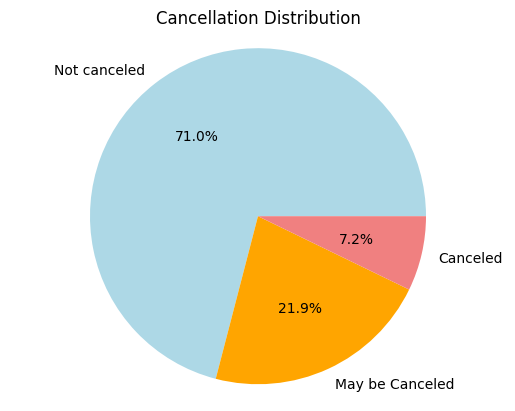

In [ ]:
# Count the frequency of each cancel value
cancel_counts = df_pandas['cancel'].value_counts()

# Create a pie chart
labels = ['Not canceled', 'May be Canceled', 'Canceled']
colors = ['lightblue', 'orange', 'lightcoral']
plt.pie(cancel_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Policy Cancellation Distribution')
plt.axis('equal')
plt.show()

*Inference:-*

*The training dataset for the target variable shows that the majority of the observations (71.0%) have a value of 'Not canceled'. This indicates that the majority of customers are likely to complete their bookings without cancellation.* 

*However, a significant proportion of the observations (21.9%) have a value of 'May be Canceled or could be convined', which suggests that there is some uncertainty about whether these bookings will be completed or not.*

*Additionally, a smaller proportion of the observations (7.2%) have a value of 'Canceled', which suggests that a small percentage of bookings are likely to be canceled.*

*NOTE: The training dataset for the target variable shows an imbalanced distribution, as the majority of the observations (71.0%) have a value of 'Not canceled', while a smaller proportion of the observations have a value of 'May be Canceled' (21.9%) or 'Canceled' (7.2%).* 

2. **Corelation Plot of Features**

In [ ]:
# define which columns should be scaled and which should be one-hot encoded
num_cols = ['ni_age', 'len_at_res', 'premium', 'n_adults', 'n_children', 'tenure','cancel']
cat_cols = ['year','house_color', 'credit', 'coverage_type','sales_channel','dwelling_type', 'ni_gender', 'ni_marital_status', 'claim_ind']

In [ ]:
# Convert specified columns to integer data type
df_pandas[num_cols] = df_pandas[num_cols].astype(float)

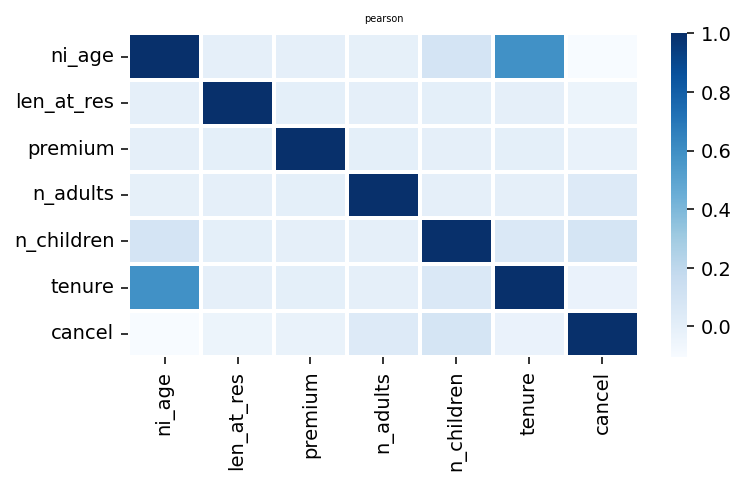

In [ ]:
# plotting heatmap usill all methods for all numerical variables
import seaborn as sns

plt.figure(figsize=(20,3), dpi=140)
for j,i in enumerate(['pearson']):
  plt.subplot(1,3,j+1)
  correlation = df_pandas[num_cols].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, cmap="Blues")
  plt.title(i, fontsize=5)

*Inference:-*

*The correlation plot for the numeric columns ni_age, len_at_res, premium, n_adults, n_children, tenure, and cancel suggests that there is a moderate positive correlation between tenure and age of policy holder with a correlation coefficient of around 0.6.*


> *This indicates that as customers get older, they tend to have longer tenure with the company. However, there are no significant correlations between any of the other columns.*


However, there are no significant correlations between any of the other columns, indicating that these features are largely independent of one another.

3. **Box Plot for Age vs Cancel Indicator**
4. **Number of Children vs Cancel Indicator**

Text(0.5, 1.0, 'Number of Children vs Cancel')

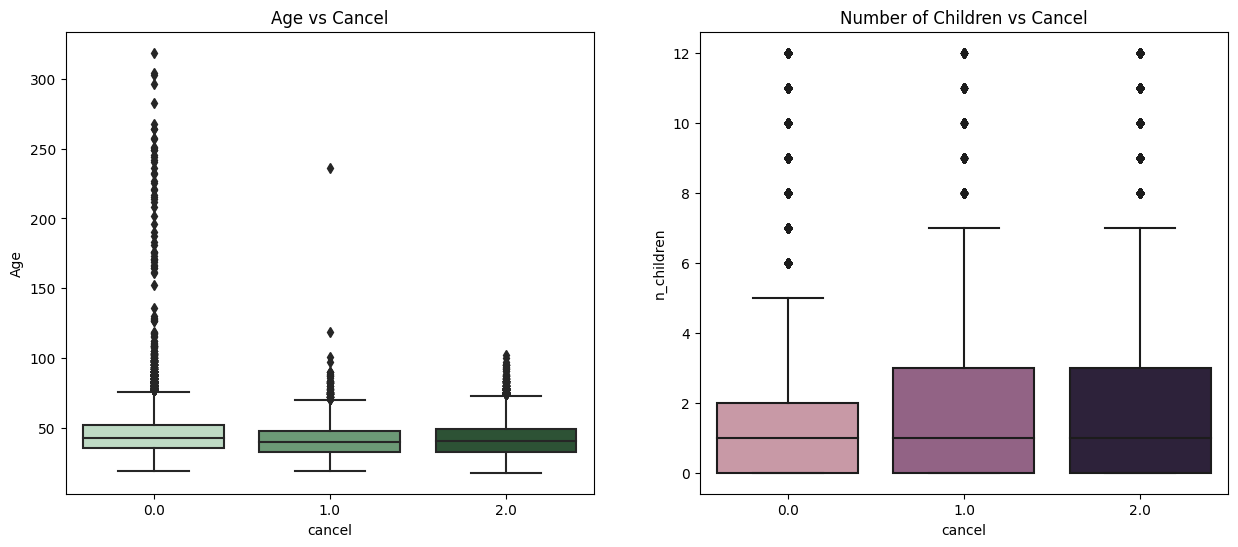

In [ ]:
# Plotting box plots of age_ni and premium vs cancel
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
palette = sns.cubehelix_palette(8)
plte = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)

sns.boxplot(x='cancel', y='ni_age', data=df_pandas, palette = [plte[6],plte[4],plte[2]], ax = ax1)
sns.boxplot(x='cancel', y='n_children', data=df_pandas, palette = [palette[2],palette[4],palette[7]], ax = ax2)
ax1.set_ylabel('Age')
ax1.set_title('Age vs Cancel')
ax2.set_title('Number of Children vs Cancel')

*Inference:-*

*Age vs Cancellation*
> *The box plot for age of policy holder vs cancel indicator shows that the age distribution for all three cancel indicator values (0, 1, and 2) is right-skewed with a few outliers.*

> *The age of policyholders who haven't cancelled their policy (cancel indicator 0) has a lot of outliers, indicating a wider age range for this group.* 

> *However, the 50th percentile (or median) age for all three cancel indicator values falls in the range of 40-50 years, which suggests that the majority of policyholders fall within this age range.*

*Number of Children vs Cancel*

> *For policyholders who haven't cancelled their policy (cancel indicator 0), the number of children ranges from 0 to 5, with a 75th percentile range of 2.This suggests that the majority of policyholders who haven't cancelled their policy have 2 children or less*


> *For policyholders with a cancel indicator value of 1 or 2 (may be canceled and canceled, respectively), the number of children ranges from 0 to 7, with a median of 3 for both groups. This suggests that policyholders who are more likely to cancel their policy may have slightly more children on average than those who haven't cancelled.*

*However, there are some outliers in all the groups, indicating that there are some policyholders with a larger number of children.*


5. **Count plot for Credit feature on Policy Cancellation Target**

[Text(0, 0, '11891'), Text(0, 0, '7824'), Text(0, 0, '6495')]

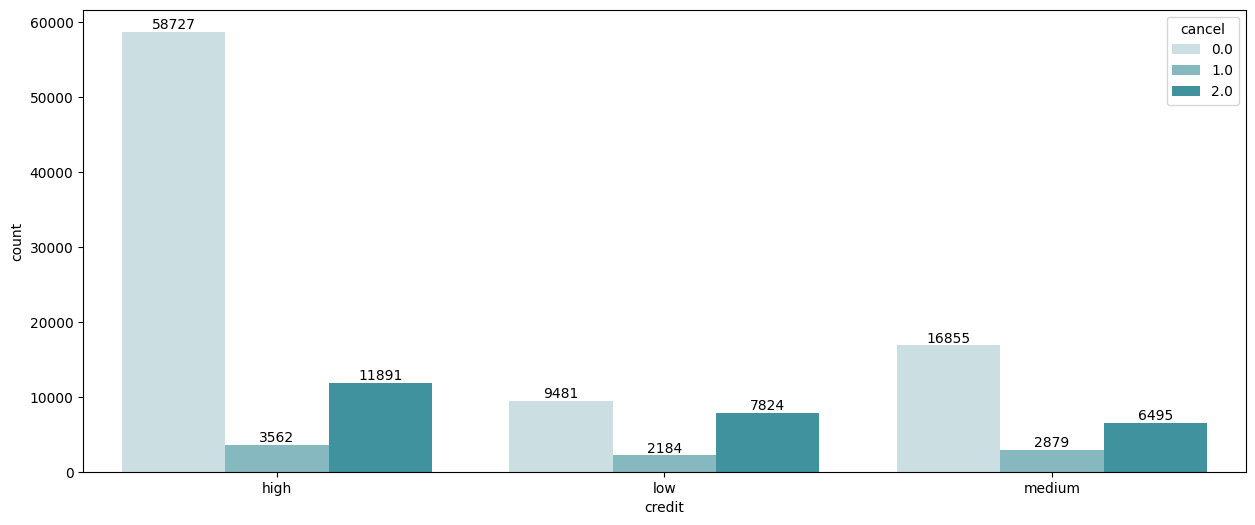

In [ ]:
# Plotting credit categories vs cancel indicator
fig, ax = plt.subplots(figsize = (15,6))

#choose nice color palette for our plot
palet = sns.light_palette((210, 90, 60), input="husl")

sns.countplot(x='credit', hue='cancel', data=df_pandas, palette = [palet[1],palet[3],palet[5]])
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.bar_label(container=ax.containers[2])

*Inference:-*

*The count plot for credit vs cancel indicator values 0, 1, and 2 shows that the distribution of credit scores differs for each cancel indicator value.*

>*The policyholders with high credit scores who have not canceled their policies are the largest group, with the frequency of (58727), followed by a much smaller number of policyholders who have cancelled their policies, and the smallest number of policyholders count are the ones who can be convinced to cancel their policies.*

>*The policyholders with medium credit scores have next contribution in the dataset. The highest number of policyholders, who do not cancel their policies (9481), followed by a smaller number of policyholders who have cancelled or likely to cancel their policies.*

>*Finally, the policyholders with low credit scores are the smallest group, with the highest number of policyholders who have not cancelled policies (16855), followed by a smaller number of policyholders who have cancelled their policies or can be convinced to cancel.*

*This suggest having high credit score has very less chance of cancellation as compared to medium or low credit score.*

6. **Plotting Coverage Type and Sales Channel vs Conversion Indicator**

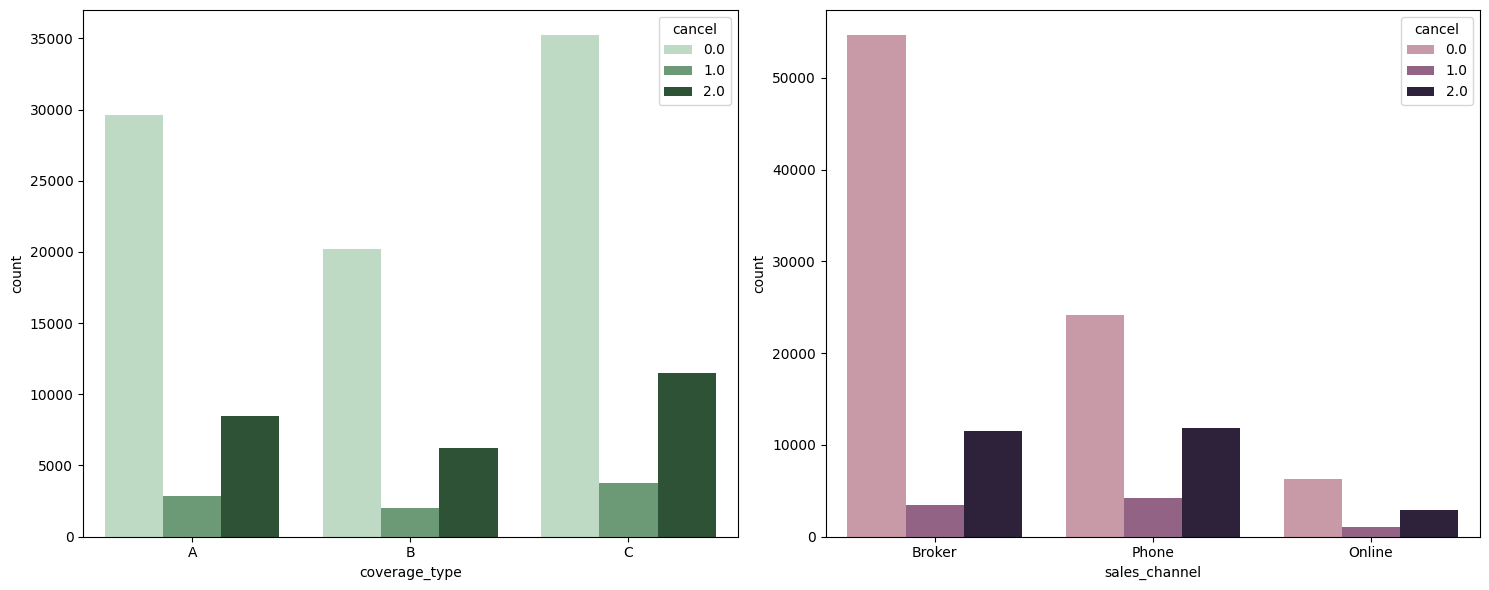

In [ ]:
#Plotting coverage type and sales channel vs conversion indicator
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
plte = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)
sns.countplot(x='coverage_type', hue='cancel', data=df_pandas, ax = ax1, palette = [plte[6],plte[4],plte[2]])
# generate the color palette
palette = sns.cubehelix_palette(8)
sns.countplot(x='sales_channel', hue='cancel', data=df_pandas, ax = ax2, palette = [palette[2],palette[4],palette[7]])
fig.tight_layout()

*Inference:-*

*Policy cancellation count per Coverage type*

> *From coverage vs cancel plot, it can be noted that coverage C has the highest count for both the cancelled and not cancelled policies, while coverage B has the lowest count for the policies that have not been cancelled.*

*Policy cancellation count per Sales channel*

> *Based on the count plot for sales channel vs cancel indicator, it can be observed that the broker channel has the highest count followed by the phone and online channels for both the customers who have cancelled their policies and the ones who have not.*

7. **Scatter Plot Age of Policyholder vs Tenure**

<Axes: xlabel='ni_age', ylabel='tenure'>

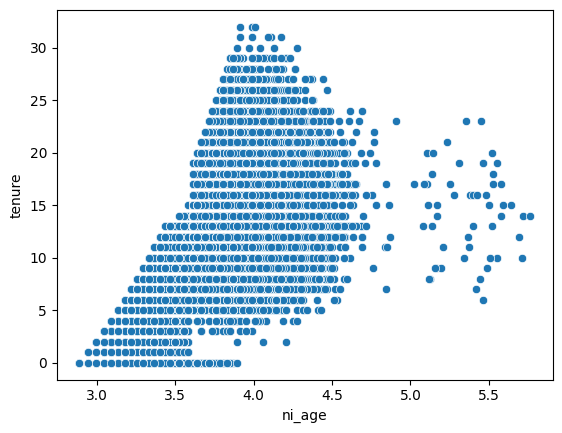

In [ ]:
sns.scatterplot(data=df_pandas, x=np.log(df_pandas['ni_age']), y='tenure')

*Inference:-*

*Based on the observation, as age of policy holder increases, tenure also increases, it is possible to infer that there could be a positive correlation between these two variables.*

 *This could be explained by the fact that older policyholders may have been associated with the insurance company for a longer period of time, and as a result, they would have a higher tenure.*
 
 * *Additionally, older policyholders may be more likely to renew their policies and maintain a longer relationship with the insurance company.*

## Tabular Visualization

In [ ]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate

1. **Tabulating percentage cancel by credit categories**

In [ ]:
# Tabulating percentage cancel by credit categories
ct = pd.crosstab(df_pandas['credit'], df_pandas['cancel'], normalize='index') * 100

# Sort features in ascending order of frequency
print(tabulate(ct.sort_values(by=list(ct.columns), ascending=False), headers=[0,1,2]))

              0         1        2
------  -------  --------  -------
high    79.1682   4.80183  16.0299
medium  64.2609  10.9764   24.7627
low     48.648   11.2063   40.1457


Inference :-

>*The above pivot table shows the percentage distribution of policy types (not cancel, might cancel, cancel) based on credit categories (high, medium, low).*

>*It suggests that as the credit score decreases from high to low, the percentage of policyholders with type 2 policies (who will cancel their policy) increases, while the percentage of policyholders with type 0 policies (one who do not cancel their policy) decreases.*

>*There is also a slight increase in the percentage of policyholders with type 1 policies for medium and low credit scores, compared to high credit scores. This may suggest a correlation between credit score and insurance risk, and the need for insurance companies to assess credit scores when underwriting policies.*

2. **Credit by Coverage Type and Sales Channel**

In [ ]:
# Create a pivot table to show the average premium for each coverage type and sales channel combination
pivot_table = pd.pivot_table(df_pandas, values='Credit', index='coverage_type', columns='sales_channel', aggfunc='count')

In [ ]:
pivot_table.head()

sales_channel,Broker,Online,Phone
coverage_type,,,
A,23785,3526,13562
B,16545,2324,9519
C,29161,4329,16891


Inference:-

> *The above pivot table shows that the credit count for broker channel seems to be the most common across all coverage types, followed by phone and online channels.*

> *We can also infer that credit count for coverage C has highest credit across all the sales channel followed by coverage A and then coverage B.*

3. **Residential Length based on Policyholder marital status and Gender**

In [ ]:
# Create a pivot table to show the average premium for each coverage type and sales channel combination
pivot_table = pd.pivot_table(df_pandas, values='len_at_res', index='ni_marital_status', columns='ni_gender', aggfunc='count')
pivot_table = pivot_table.rename(index={0: 'No', 1: 'Yes'})

In [ ]:
pivot_table.head()

ni_gender,F,M
ni_marital_status,,
0.0,16871,18049
1.0,40534,44192


*Inference:-*

>*The given pivot table shows the length of residence of polichyholders based on their gender and marital statu (0 for single, and 1 for married).*

>*The table shows that for length of residence of policyholders that there are 16,871 single females and 18,049 single males, while there are 40,534 married females and 44,192 married males.*

>*It appears that there are more married policyholders than single policyholders, and more male policyholders than female policyholders.*

4. **Premium by combination of Credit and Dwelling Type**

In [ ]:
# Let's create a pivot table for multi-variate analysis
pd.pivot_table(df_pandas, values='premium', index='credit', columns='dwelling_type', aggfunc='count')

dwelling_type,Condo,House,Tenant
credit,,,
high,17653,41799,14581
low,4724,10814,3922
medium,6304,14603,5268


*Inference:-*

>*The above tabular pivot report shows the count of premiums for different combinations of dwelling types and credit types.* 

>*It indicates that the highest premium count is for houses with high credit, followed by houses with medium credit and condos with high credit.*

>*NOTE: It can be generalised that high credit score have high premium regardless of their dwelling type.*

>*Also, the lowest premium count is for tenants for all the credit types, with minimum count of 3922.*


5. **Premium amount for coverage type and Credit level**




In [ ]:
# Let's create a pivot table for multi-variate analysis
pd.pivot_table(df_pandas, values='premium', index=['coverage_type'], columns=['credit'], aggfunc='count')

credit,high,low,medium
coverage_type,,,
A,25322,6607,8953
B,17577,4589,6226
C,31122,8269,10994


*Inference:-*

>*The above pivot table shows the relationship between premium count and combination of credit type and coverage type.*

>*It can be observed that the people with high credit have high premium across all coverage type, maximum. The lowest premium count is for coverage type B with low credit, with a minimum count of 4589.*

>This indicates that customers with higher credit scores are more likely to opt for higher coverage options, resulting in higher premium counts.

>Additionally, the lower premium counts for coverage type B and low credit may indicate that these customers are more budget-conscious and prefer lower coverage options.

# Data Cleaning and Feature Engineering 

## Extracting States from zipcodes

In [10]:
# Let's create states from zipcodes
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from uszipcode import SearchEngine

# Define a function to extract state from zipcode
def get_state_from_zip(zipcode):
    search = SearchEngine()
    try:
        zipcode_data = search.by_zipcode(zipcode)
        state = zipcode_data.state
    except:
        state = None
    return state

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
from pyspark.sql.functions import udf, regexp_replace
from pyspark.sql.types import StringType

# Define a user-defined function (UDF) to extract state from zip code
get_state_udf = udf(get_state_from_zip, StringType())

# Cast the zip code column to double type and then to string type to remove decimal point
df_renamed = df_renamed.withColumn("zip_code", col("zip_code").cast("double"))  # cast to double type
df_renamed = df_renamed.withColumn("zip_code", regexp_replace(col("zip_code"), "\\.0", "").cast("string"))  # cast to string type and remove decimal point

# Apply the UDF to extract state from zip code
df_renamed = df_renamed.withColumn("state", get_state_udf(col("zip_code")))

# Repeat the same process for the test dataset
df_test = df_test.withColumn("zip_code", col("zip_code").cast("double"))  # cast to double type
df_test = df_test.withColumn("zip_code", regexp_replace(col("zip_code"), "\\.0", "").cast("string"))  # cast to string type and remove decimal point
df_test = df_test.withColumn("state", get_state_udf(col("zip_code")))

In [ ]:
# Let's check our work
df_renamed.show()

+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+-----+
|     id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|state|
+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+-----+
| 688609|2016|   50001|      white|  44.0|      25.0|  high|            A|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|   IA|
| 308155|2015|   50048|     yellow|  31.0|      22.0|  high|            B|       Tenant|      1003.420558|       Broker|        M|              0.0|     2.0|       0.0|   8.0|      1.0|     0|   IA|
| 240

In [12]:
# Let's remove zip and year as we won't be needing that column for modeling
df_renamed = df_renamed.drop('zip_code')
df_test = df_test.drop('zip_code')

## Checking Missing Values

In [ ]:
# Create an empty list to store column names with null values
null_columns = []

# Check for null values in each column
for col_name in df_renamed.columns:
    if df_renamed.filter(F.col(col_name).isNull()).count() > 0:
        null_columns.append(col_name)

# Print the list of columns with null values
print("Columns with null values:", null_columns)

Columns with null values: ['house_color', 'ni_age', 'len_at_res', 'credit', 'coverage_type', 'dwelling_type', 'premium', 'sales_channel', 'ni_gender', 'ni_marital_status', 'n_adults', 'n_children', 'tenure', 'claim_ind', 'state']


In [13]:
# Let's create a list of columns that are numerical that will be imputed seperately

CONTINUOUS_COLUMNS = [
"len_at_res",
"premium",
"tenure",
"ni_age",
'n_adults', 
'n_children',
]
print(CONTINUOUS_COLUMNS)

['len_at_res', 'premium', 'tenure', 'ni_age', 'n_adults', 'n_children']


In [14]:
# make continuous columns from string to double
for column in CONTINUOUS_COLUMNS:
  df_renamed = df_renamed.withColumn(column, F.col(column).cast(T.DoubleType()))
  df_test = df_test.withColumn(column, F.col(column).cast(T.DoubleType())) #Cast the datatype

## Imputing missing values in Categorical Features

In [15]:
# Create a list of categorical columns
CATEGORICAL_COLUMNS = [
    x
    for x in df_renamed.columns
    if x not in CONTINUOUS_COLUMNS and x not in ['id', 'year','cancel']
]
print(CATEGORICAL_COLUMNS)

['house_color', 'credit', 'coverage_type', 'dwelling_type', 'sales_channel', 'ni_gender', 'ni_marital_status', 'claim_ind', 'state']


In [16]:
# Calculate the mode (most frequent value) for each column
mode_values = df_renamed.agg(*[F.mode(c).alias(c) for c in CATEGORICAL_COLUMNS])

# Impute missing values with mode values
df_imputed = df_renamed.fillna(mode_values.first().asDict(), subset=CATEGORICAL_COLUMNS )
df_test = df_test.fillna(mode_values.first().asDict(), subset=CATEGORICAL_COLUMNS )

In [ ]:
# Let's check our dataframe
df_imputed.show()

+-------+----+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+-----+
|     id|year|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|state|
+-------+----+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+-----+
| 688609|2016|      white|  44.0|      25.0|  high|            A|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|   IA|
| 308155|2015|     yellow|  31.0|      22.0|  high|            B|       Tenant|      1003.420558|       Broker|        M|              0.0|     2.0|       0.0|   8.0|      1.0|     0|   IA|
| 240486|2015|      white|  39.0|      17.0|   low

In [ ]:
# Let's check if our code has worked by checking columns having null once again
# Create an empty list to store column names with null values
null_columns_train = []
null_columns_test = []


# Check for null values in each column
for col_name in df_imputed.columns:
    if df_imputed.filter(F.col(col_name).isNull()).count() > 0:
        null_columns_train.append(col_name)

# Check for null values in each column
for col_name in df_test.columns:
    if df_test.filter(F.col(col_name).isNull()).count() > 0:
        null_columns_test.append(col_name)

# Print the list of columns with null values
print("Columns with null values in train:", null_columns_train)
print("Columns with null values in test:", null_columns_test)

Columns with null values in train: ['ni_age', 'len_at_res', 'premium', 'n_adults', 'n_children', 'tenure']
Columns with null values in test: ['ni_age', 'len_at_res', 'premium', 'n_adults', 'n_children', 'tenure']


## Imputing missing values in Numerical Features

In [17]:
# Let's split our numerical columns into continuous and binning columns
CONTINUOUS_COLUMNS = [
"len_at_res",
"premium",
"tenure",
]
print(CONTINUOUS_COLUMNS)
BINNING_COLUMNS = [
"ni_age",
'n_adults', 
'n_children',
]    
print(BINNING_COLUMNS)

['len_at_res', 'premium', 'tenure']
['ni_age', 'n_adults', 'n_children']


In [18]:
# Let's impute the median values in our binning columns using Imputer class from PySpark ML library
# Set the stages for the binning columns pipeline
from pyspark.ml import Pipeline
import pyspark.ml.feature as MF

# The list of original column names for which we are creating imputed columns
OLD_COLS = ['ni_age', 'n_adults', 'n_children']

# The list of new column names created after imputing
NEW_COLS = ['ni_age_i','n_adults_i', 'n_children_i']

# Create an instance of Imputer class from PySpark ML library with median imputation strategy
imputer = MF.Imputer(
    strategy="median",
    inputCols=OLD_COLS,                           
    outputCols=NEW_COLS,
)

# Fit the imputer model on the training data
imputer_model = imputer.fit(df_imputed) 

# Use the imputer model to transform the training data
df_final = imputer_model.transform(df_imputed)

# Use the imputer model to transform the test data
df_test = imputer_model.transform(df_test)

# Display the resulting data frame after median imputation
df_final.show(truncate=False)

+-------+----+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+-----+--------+----------+------------+
|id     |year|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|premium          |sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|state|ni_age_i|n_adults_i|n_children_i|
+-------+----+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+-----+--------+----------+------------+
|688609 |2016|white      |44.0  |25.0      |high  |A            |Condo        |950.7386189      |Broker       |F        |1.0              |3.0     |0.0       |17.0  |0.0      |0     |IA   |44.0    |3.0       |0.0         |
|308155 |2015|yellow     |31.0  |22.0      |high  |B            |Tenant       |1003.420558      |Broker     

### Pipeline for Transformation of continuous features

In [19]:
# Let's create a pipeline for continuous columns

# Define the list of columns we want to impute, and the names of the new columns
OLD_COLS = ['len_at_res', 'premium', 'tenure']
NEW_COLS = ['len_at_res_i', 'premium_i', 'tenure_i']

# Create an imputer transformer to fill missing values with the median of each column
imputer = MF.Imputer(
    strategy="median",
    inputCols=OLD_COLS,                           
    outputCols=NEW_COLS,
)

# Create a vector assembler transformer to combine the imputed columns into a single vector
continuous_assembler = MF.VectorAssembler(   
    inputCols=NEW_COLS,
    outputCol="continuous",
)

# Create a MinMaxScaler transformer to scale the continuous features between 0 and 1
continuous_scaler = MF.MinMaxScaler(         
     inputCol="continuous",
   outputCol="continuous_scaled",
)

# Create a pipeline to apply the imputer, vector assembler, and scaler transformers in sequence
train_pipeline = Pipeline(                    
     stages=[imputer, continuous_assembler, continuous_scaler]
)

In [20]:
# Set the stages for the continuous columns pipeline
train_pipeline.setStages(
    [imputer, continuous_assembler, continuous_scaler]
)
 
# Update the list of continuous columns to include the new columns generated by the pipeline
CONTINUOUS_COLUMNS = (
    list(set(CONTINUOUS_COLUMNS) - set(OLD_COLS)) + NEW_COLS  
)

# Fit the pipeline model on the training dataset
train_pipeline_model = train_pipeline.fit(df_final)  

# Transform the training and test datasets with the pipeline model to include the new continuous columns
train_features = train_pipeline_model.transform(df_final)
df_test = train_pipeline_model.transform(df_test)

# Display the "cancel" and "continuous_scaled" columns for the first five rows of the transformed training dataset
train_features.select("cancel", "continuous_scaled").show(5, truncate=30)

+------+------------------------------+
|cancel|             continuous_scaled|
+------+------------------------------+
|     0|[0.47928493771387476,0.5412...|
|     0|[0.4167695110555433,0.62614...|
|     0|[0.3125771332916574,0.33476...|
|     0|[0.4167695110555433,0.34200...|
|     0|[0.2292232310805488,0.14821...|
+------+------------------------------+
only showing top 5 rows



In [21]:
# Let's drop the columns not needed
# Now we can drop "ni age", "n adults", "n children", "age_bin", "adult_bin", "child_bin"
columns_to_drop = ['ni_age', 'len_at_res', 'premium', 'tenure', 'n_adults', 'n_children']

# Drop the columns
train_features = train_features.drop(*columns_to_drop)
df_test = df_test.drop(*columns_to_drop)

In [22]:
# Let's check if our code has worked by checking for missing values
# Create an empty list to store column names with null values
null_columns_train = []
null_columns_test = []


# Check for null values in each column
for col_name in train_features.columns:
    if train_features.filter(F.col(col_name).isNull()).count() > 0:
        null_columns_train.append(col_name)

# Check for null values in each column
for col_name in df_test.columns:
    if df_test.filter(F.col(col_name).isNull()).count() > 0:
        null_columns_test.append(col_name)

# Print the list of columns with null values
print("Columns with null values in train:", null_columns_train)
print("Columns with null values in test:", null_columns_test)

Columns with null values in train: []
Columns with null values in test: []


In [ ]:
# Let's check the distribution of continuous features to check for outliers

train_features.select(['ni_age_i', 'len_at_res_i', 'premium_i', 'tenure_i', 'n_adults_i', 'n_children_i']).summary(
"mean",
"stddev",
"min",
"1%",
"25%",
"50%",
"75%",
"99%",
"max",
).show()

+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|          ni_age_i|      len_at_res_i|        premium_i|          tenure_i|        n_adults_i|      n_children_i|
+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|   mean|43.545098894471494|15.197963502375263|899.8208192093799|11.660558333333332|2.1345916666666667|1.7363916666666668|
| stddev| 12.37295785134236| 4.554005928463922|77.75382414264597| 5.929603473806268| 1.249262351176647| 2.349215820237747|
|    min|              18.0|               2.0|614.7618825000001|               0.0|               1.0|               0.0|
|     1%|              22.0|               7.0|      730.4598276|               0.0|               1.0|               0.0|
|    25%|              35.0|              12.0|      843.6975149|               6.0|               1.0|               0.0|
|    50%|       

## Outlier Correction

In [ ]:
# We can see that we have max age as 318
# let's check for how many entries we have age > 110
train_features.filter(F.col("ni_age_i") > 110).count()

69

In [23]:
# let's impute values of age > 110 by 110 
from pyspark.sql.functions import when, col

train_features = train_features.withColumn(
    "ni_age_i",
    when(col("ni_age_i") > 110, 110).otherwise(col("ni_age_i"))
)
df_test = df_test.withColumn(
    "ni_age_i",
    when(col("ni_age_i") > 110, 110).otherwise(col("ni_age_i"))
)

## Creating buckets using Bucketizer

Features like Age, No. of adults and no. of children could be transformed into buckets as this could provide us better inference when we create our model

In [24]:
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col

# Define splits for age column
age_splits = [float('-inf'), 30, 40, 50, 60, float('inf')]

# Define splits for n adults column
adult_splits = [float('-inf'), 1, 2, 3, 4, float('inf')]

# Define splits for n children column
child_splits = [float('-inf'), 1, 2, 3,  float('inf')]

# Create bucketizer instances for each column
age_bucketizer = Bucketizer(splits=age_splits, inputCol='ni_age_i', outputCol='age_bin')
adult_bucketizer = Bucketizer(splits=adult_splits, inputCol='n_adults_i', outputCol='adult_bin')
child_bucketizer = Bucketizer(splits=child_splits, inputCol='n_children_i', outputCol='child_bin')

# Apply bucketizers to DataFrame
df_binned = age_bucketizer.transform(train_features)
df_binned = adult_bucketizer.transform(df_binned)
df_binned = child_bucketizer.transform(df_binned)

df_test = age_bucketizer.transform(df_test)
df_test = adult_bucketizer.transform(df_test)
df_test = child_bucketizer.transform(df_test)

df_binned.show()

+-------+----+-----------+------+-------------+-------------+-------------+---------+-----------------+---------+------+-----+--------+----------+------------+------------+-----------------+--------+--------------------+--------------------+-------+---------+---------+
|     id|year|house_color|credit|coverage_type|dwelling_type|sales_channel|ni_gender|ni_marital_status|claim_ind|cancel|state|ni_age_i|n_adults_i|n_children_i|len_at_res_i|        premium_i|tenure_i|          continuous|   continuous_scaled|age_bin|adult_bin|child_bin|
+-------+----+-----------+------+-------------+-------------+-------------+---------+-----------------+---------+------+-----+--------+----------+------------+------------+-----------------+--------+--------------------+--------------------+-------+---------+---------+
| 688609|2016|      white|  high|            A|        Condo|       Broker|        F|              1.0|      0.0|     0|   IA|    44.0|       3.0|         0.0|        25.0|      950.7386189|

In [25]:
# Let's provide the buckets some meaningfull names to make sense of these buckets

from pyspark.sql.functions import udf
# Define function to recode buckets as strings
def age_recode(bucket):
    if bucket == 0:
        return "18-29"
    elif bucket == 1:
        return "30-39"
    elif bucket == 2:
        return "40-49"
    elif bucket == 3:
        return "50-59"
    else:
        return "60+"

# Create udf
age_recode_udf = udf(lambda x: age_recode(x))
# Apply udf to age_bucket column
df_binned = df_binned.withColumn("age_bucket_label", age_recode_udf("age_bin"))
df_test = df_test.withColumn("age_bucket_label", age_recode_udf("age_bin"))

In [26]:
# Define function to recode buckets as strings
def adult_recode(bucket):
    if bucket == 0:
        return "0"
    elif bucket == 1:
        return "1"
    elif bucket == 2:
        return "2"
    elif bucket == 3:
        return "3"
    else:
        return "3+"
# Create udf
adult_recode_udf = udf(lambda x: adult_recode(x))
# Apply udf to age_bucket column
df_binned = df_binned.withColumn("adult_bucket_label", adult_recode_udf("adult_bin"))
df_test = df_test.withColumn("adult_bucket_label", adult_recode_udf("adult_bin"))

In [27]:
# Define function to recode buckets as strings
def child_recode(bucket):
    if bucket == 0:
        return "0"
    elif bucket == 1:
        return "1"
    elif bucket == 2:
        return "2"
    else:
        return "2+"
# Create udf
child_recode_udf = udf(lambda x: child_recode(x))
# Apply udf to age_bucket column
df_binned = df_binned.withColumn("child_bucket_label", child_recode_udf("child_bin"))
df_test = df_test.withColumn("child_bucket_label", child_recode_udf("child_bin"))
df_binned.show()

+-------+----+-----------+------+-------------+-------------+-------------+---------+-----------------+---------+------+-----+--------+----------+------------+------------+-----------------+--------+--------------------+--------------------+-------+---------+---------+----------------+------------------+------------------+
|     id|year|house_color|credit|coverage_type|dwelling_type|sales_channel|ni_gender|ni_marital_status|claim_ind|cancel|state|ni_age_i|n_adults_i|n_children_i|len_at_res_i|        premium_i|tenure_i|          continuous|   continuous_scaled|age_bin|adult_bin|child_bin|age_bucket_label|adult_bucket_label|child_bucket_label|
+-------+----+-----------+------+-------------+-------------+-------------+---------+-----------------+---------+------+-----+--------+----------+------------+------------+-----------------+--------+--------------------+--------------------+-------+---------+---------+----------------+------------------+------------------+
| 688609|2016|      white

In [28]:
# Now we can drop "ni age", "n adults", "n children", "age_bin", "adult_bin", "child_bin"
columns_to_drop = ["ni_age_i", "n_adults_i", "n_children_i", "age_bin", "adult_bin", "child_bin"]

# Drop the columns
df_binned = df_binned.drop(*columns_to_drop)
df_test = df_test.drop(*columns_to_drop)

In [65]:
# Let's check our dataframe with binned features
df_binned.show()

+-------+----+-----------+------+-------------+-------------+-------------+---------+-----------------+---------+------+-----+------------+-----------------+--------+--------------------+--------------------+----------------+------------------+------------------+
|     id|year|house_color|credit|coverage_type|dwelling_type|sales_channel|ni_gender|ni_marital_status|claim_ind|cancel|state|len_at_res_i|        premium_i|tenure_i|          continuous|   continuous_scaled|age_bucket_label|adult_bucket_label|child_bucket_label|
+-------+----+-----------+------+-------------+-------------+-------------+---------+-----------------+---------+------+-----+------------+-----------------+--------+--------------------+--------------------+----------------+------------------+------------------+
| 688609|2016|      white|  high|            A|        Condo|       Broker|        F|              1.0|      0.0|     0|   IA|        25.0|      950.7386189|    17.0|[25.0,950.7386189...|[0.47928493771387...|

## One-Hot Encoding

In [29]:
# Now we'll perform one-hot encoding

# We'll first define the columns to pivot on
pivot_cols = ['year',"house_color","credit","coverage_type","dwelling_type","sales_channel", "ni_gender", "age_bucket_label","adult_bucket_label","child_bucket_label", "state"]
# Then we define the keys to group on
keys = ['id']

# Helper function to recursively join a list of dataframes

def join_all_train(dfs,keys):
    # if there is more than one dataframe in the list
    if len(dfs) > 1:
        # recursively join the remaining dataframes
        return dfs[0].join(join_all_train(dfs[1:],keys), on = keys, how = 'inner')
    else:
        # if there is only one dataframe, return it
        return dfs[0]

# Similar helper function for test data
def join_all_test(dfss,keys):
    if len(dfss) > 1:
        return dfss[0].join(join_all_test(dfss[1:],keys), on = keys, how = 'inner')
    else:
        return dfss[0]

dfs = []
dfss = []
combined_train = []
combined_test = []

# loop through each pivot column
for pivot_col in pivot_cols:
    # group by the keys and pivot on the column
    pivotDF = df_binned.groupBy(keys).pivot(pivot_col).count()
    # rename the columns to include the pivot column name
    new_names = pivotDF.columns[:len(keys)] +  ["{0}_{1}".format(pivot_col, c) for c in pivotDF.columns[len(keys):]]        
    df = pivotDF.toDF(*new_names).fillna(0)    
    combined_train.append(df)

# Repeat for test data
for pivot_col in pivot_cols:
    pivotDF = df_test.groupBy(keys).pivot(pivot_col).count()
    new_names = pivotDF.columns[:len(keys)] +  ["{0}_{1}".format(pivot_col, c) for c in pivotDF.columns[len(keys):]]        
    df = pivotDF.toDF(*new_names).fillna(0)    
    combined_test.append(df)

# join all the dataframes into one large dataframe
join_all_train(combined_train,keys).show()

+-------+---------+---------+---------+---------+----------------+---------------+-----------------+------------------+-----------+----------+-------------+---------------+---------------+---------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-----------+-----------+----------------------+----------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+--------+--------+--------+--------+--------+--------+
|     id|year_2013|year_2014|year_2015|year_2016|house_color_blue|house_color_red|house_color_white|house_color_yellow|credit_high|credit_low|credit_medium|coverage_type_A|coverage_type_B|coverage_type_C|dwelling_type_Condo|dwelling_type_House|dwelling_type_Tenant|sales_channel_Broker|sales_channel_Online|sale

In [30]:
# Join the one-hot encoded features back to the original DataFrame
df_encoded = join_all_train(combined_train, keys)
df_renamed_encoded = df_binned.join(df_encoded, on=keys, how='left')

df_encoded_t = join_all_test(combined_test, keys)
df_test = df_test.join(df_encoded_t, on=keys, how='left')


In [31]:
# Drop the columns
df_renamed_encoded = df_renamed_encoded.drop(*pivot_cols)
df_test = df_test.drop(*pivot_cols)

In [64]:
# Show the resulting DataFrame
df_renamed_encoded.show(truncate=False)

+-------+-----------------+---------+------+------------+-----------------+--------+-----------------------------+-------------------------------------------------+---------+---------+---------+---------+----------------+---------------+-----------------+------------------+-----------+----------+-------------+---------------+---------------+---------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-----------+-----------+----------------------+----------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+--------+--------+--------+--------+--------+--------+------+
|id     |ni_marital_status|claim_ind|cancel|len_at_res_i|premium_i        |tenure_i|continuous                   |continuous_scaled                  

In [63]:
# Let's check datatypes
df_renamed_encoded.printSchema()

root
 |-- id: string (nullable = true)
 |-- ni_marital_status: double (nullable = true)
 |-- claim_ind: double (nullable = true)
 |-- cancel: double (nullable = true)
 |-- len_at_res_i: double (nullable = true)
 |-- premium_i: double (nullable = true)
 |-- tenure_i: double (nullable = true)
 |-- continuous: vector (nullable = true)
 |-- continuous_scaled: vector (nullable = true)
 |-- year_2013: long (nullable = true)
 |-- year_2014: long (nullable = true)
 |-- year_2015: long (nullable = true)
 |-- year_2016: long (nullable = true)
 |-- house_color_blue: long (nullable = true)
 |-- house_color_red: long (nullable = true)
 |-- house_color_white: long (nullable = true)
 |-- house_color_yellow: long (nullable = true)
 |-- credit_high: long (nullable = true)
 |-- credit_low: long (nullable = true)
 |-- credit_medium: long (nullable = true)
 |-- coverage_type_A: long (nullable = true)
 |-- coverage_type_B: long (nullable = true)
 |-- coverage_type_C: long (nullable = true)
 |-- dwelling_ty

In [32]:
# There are still three columns that need to be converted to double before we can model
col_conv = ['cancel', 'ni_marital_status', 'claim_ind']
for column in col_conv:
  df_renamed_encoded = df_renamed_encoded.withColumn(column, F.col(column).cast(T.DoubleType()))
  df_test = df_test.withColumn(column, F.col(column).cast(T.DoubleType()))

## Creating List of Identifier, Continuous, Binary and Target features

In [33]:
# Let's create a list of our identifier column
IDENTIFIERS = ["id"]
print(IDENTIFIERS)

['id']


In [34]:
# Let's create a list of our continuous columns
CONTINUOUS_COLUMNS = [
"len_at_res_i",
"premium_i",
"tenure_i",
]
print(CONTINUOUS_COLUMNS)

['len_at_res_i', 'premium_i', 'tenure_i']


In [35]:
# Let's create a list of our target column
TARGET_COLUMN = ["cancel"]
print(TARGET_COLUMN)

['cancel']


In [36]:
# Let's create a list of our binary columns
BINARY_COLUMNS = [
    x
    for x in df_renamed_encoded.columns
    if x not in CONTINUOUS_COLUMNS and x not in TARGET_COLUMN and x not in IDENTIFIERS and x not in ['continuous', 'continuous_scaled']
]
print(BINARY_COLUMNS)

['ni_marital_status', 'claim_ind', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'house_color_blue', 'house_color_red', 'house_color_white', 'house_color_yellow', 'credit_high', 'credit_low', 'credit_medium', 'coverage_type_A', 'coverage_type_B', 'coverage_type_C', 'dwelling_type_Condo', 'dwelling_type_House', 'dwelling_type_Tenant', 'sales_channel_Broker', 'sales_channel_Online', 'sales_channel_Phone', 'ni_gender_F', 'ni_gender_M', 'age_bucket_label_18-29', 'age_bucket_label_30-39', 'age_bucket_label_40-49', 'age_bucket_label_50-59', 'age_bucket_label_60+', 'adult_bucket_label_1', 'adult_bucket_label_2', 'adult_bucket_label_3', 'adult_bucket_label_3+', 'child_bucket_label_0', 'child_bucket_label_1', 'child_bucket_label_2', 'child_bucket_label_2+', 'state_AZ', 'state_CO', 'state_IA', 'state_PA', 'state_VA', 'state_WA']


In [37]:
feature_names = BINARY_COLUMNS + CONTINUOUS_COLUMNS

In [62]:
# Let's check the distribution of our continuous columns after cleaning
df_renamed_encoded.select(*CONTINUOUS_COLUMNS).summary().show()

+-------+------------------+-----------------+------------------+
|summary|      len_at_res_i|        premium_i|          tenure_i|
+-------+------------------+-----------------+------------------+
|  count|            120000|           120000|            120000|
|   mean|15.197963502375263|899.8208192093799|11.660558333333332|
| stddev| 4.554005928463922|77.75382414264597| 5.929603473806268|
|    min|               2.0|614.7618825000001|               0.0|
|    25%|              12.0|      843.6975149|               6.0|
|    50%|              15.0|899.5015582999998|              13.0|
|    75%|              18.0|       955.396229|              16.0|
|    max|       49.98815525|      1235.480942|              32.0|
+-------+------------------+-----------------+------------------+



## Checking for reliable binary predictors

In this section, We remove the columns that are not present enough in the data set to be considered reliable predictors. Binary features with only a few zeroes or ones are not helpful in classifying.

In [66]:
#get sum of each binary column
# remember that we are dealing with just 0s and 1s here...
inst_sum_of_binary_columns = [F.sum(F.col(x)).alias(x) for x in BINARY_COLUMNS]

In [ ]:
#got the first few rows of inst_sum_of_binar y_columns and make it as dictionary
sum_of_binary_columns = (df_renamed_encoded.select(*inst_sum_of_binary_columns).head().asDict())

In [ ]:
#count number of rows
num_rows = df_renamed_encoded.count()

In [ ]:
# find out the number of times each one occurs
# eliminate column if less than 100 occurances 
too_rare_features = [k for k, v in sum_of_binary_columns.items() if v < 100 or v > (num_rows - 100)]

Thus, none of our binary features are sparse enough or seem to lack the data variance to consider them to be unreliable predictors or to be lacking information and that should be removed before modeling.

In [ ]:
#there are 0 binary features like this
len(too_rare_features) # => 0

In [ ]:
# Let's check the transformed dense vector
df_renamed_encoded.select("continuous").show(3, False)

In [ ]:
# Let's display the continuous scaled dense vector
df_renamed_encoded.select("continuous_scaled").show(3, False)

In [61]:
# Let's check the schema of our data before we begin to model
df_renamed_encoded.printSchema()

root
 |-- id: string (nullable = true)
 |-- ni_marital_status: double (nullable = true)
 |-- claim_ind: double (nullable = true)
 |-- cancel: double (nullable = true)
 |-- len_at_res_i: double (nullable = true)
 |-- premium_i: double (nullable = true)
 |-- tenure_i: double (nullable = true)
 |-- continuous: vector (nullable = true)
 |-- continuous_scaled: vector (nullable = true)
 |-- year_2013: long (nullable = true)
 |-- year_2014: long (nullable = true)
 |-- year_2015: long (nullable = true)
 |-- year_2016: long (nullable = true)
 |-- house_color_blue: long (nullable = true)
 |-- house_color_red: long (nullable = true)
 |-- house_color_white: long (nullable = true)
 |-- house_color_yellow: long (nullable = true)
 |-- credit_high: long (nullable = true)
 |-- credit_low: long (nullable = true)
 |-- credit_medium: long (nullable = true)
 |-- coverage_type_A: long (nullable = true)
 |-- coverage_type_B: long (nullable = true)
 |-- coverage_type_C: long (nullable = true)
 |-- dwelling_ty

## Joining Binary Features and Continuous Vector to create our final feature vector 

In [38]:
# New Vector Assembler to create a dense vector
preml_assembler = MF.VectorAssembler(
inputCols=BINARY_COLUMNS
+ ["continuous_scaled"],
outputCol="features",
)

# Model development

Initially, we split the train data into 75:25 for train and validation subset.

We tried different models on train, and checked the performance on validation.

Since our classes are imbalanced, we tried different class_weights on the train subset as well. 

Ideally, class weights should be based on the distribution of the classes
Ideal class weights - {0: 1/0.71, 1: 1/0.07, 2: 1/0.22}

But we do not get the optimal F1 using these weights.

So we tried different combinations of class weights to optimize our score

The class weights of {0: 1, 1: 1, 2: 1.8} seems to give us the best possible F1 and that is why it has been used below.


Models Fitted:
1. Logistic Regression
2. Decsion Tree
3. Random Forest Classifier
4. One vs Rest (Logistic Regression with CV)
5. Multi-Layer Perceptron Classifier

The best model comes out to be Logistic Regression.

Due to the size of the data and features, we could not incorporate cross-validation. When we had not included the states as a feature, we did try cross validation on the data. But after including states, we observed an increase in accuracy but the data became too big for cross validation.

In [39]:
# Optimal class weights obtained through multiple permutations
class_weights = {0: 1, 1: 1, 2: 1.8}

In [40]:
# Let's add the class weights as a column in our dataframe that will be later used for modelling
from itertools import chain
mapping_expr = F.create_map([F.lit(x) for x in chain(*class_weights.items())])

df_renamed_encoded = df_renamed_encoded.withColumn("weight", mapping_expr.getItem(F.col("cancel")))


/usr/local/lib/python3.10/dist-packages/pyspark/sql/column.py:458: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


## Model Pipeline

We could not add the stages of our previous pipeline like imputer, continuous assembler and continuous scaler as a lot of operations are performed after running those stages.

We have created bins for a few features, renamed those bins, and then performed one-hot encoding on the categorical features.

Thus, our pipeline for modeling only consists of two stages:
1. preml_assembler - used to combine scaled and binary features
2. logistic regression model

In [41]:
# Now we create our logistic regression model

from pyspark.ml.classification import LogisticRegression
 
lr = LogisticRegression(
    featuresCol="features", labelCol="cancel", predictionCol="prediction_lr", weightCol="weight"
)

# Our pipeline consists of combining the continuous variables and the binary variables through our assembler and then running the model 
train_pipeline.setStages(
    [   preml_assembler,
        lr
     ]
)

Pipeline_db518dc354f6

In [42]:
# Now we fit our model on the train, and make predictions for train and test
train_pipeline_model = train_pipeline.fit(df_renamed_encoded)  

In [50]:
# Let's get the predictions for train
results_lr_train = train_pipeline_model.transform(df_renamed_encoded)

In [43]:
# Let's get the predictions for test
results_lr = train_pipeline_model.transform(df_test)

In [ ]:
# Let's evaluate the model to check for the F1 score
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="cancel", predictionCol="prediction_lr", metricName="f1")
# Calculate weighted average F1 score
weighted_f1 = evaluator.evaluate(results_lr)
print(f"Weighted avg F1: {weighted_f1}")

Weighted avg F1: 0.6795474479740478


# Model Results

## Classification Report for Train

In [52]:
# Let's select the columns we need
results_pd_train = results_lr_train.select('cancel', 'prediction_lr')

In [53]:
# Convert to Pandas dataframe
results_pd_train = results_pd_train.toPandas()

In [54]:
from sklearn.metrics import classification_report

# Get target and predictions as arrays
target_train = results_pd_train['cancel'].values
predictions_train = results_pd_train['prediction_lr'].values

# Generate classification report
report_train = classification_report(target_train, predictions_train)
print(report_train)

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82     85143
         1.0       0.00      0.00      0.00      8630
         2.0       0.45      0.44      0.45     26227

    accuracy                           0.71    120000
   macro avg       0.41      0.44      0.42    120000
weighted avg       0.65      0.71      0.68    120000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification Report for Test

In [45]:
# Let's select the columns we need
results_pd = results_lr.select('cancel', 'prediction_lr')

In [46]:
# Convert to Pandas dataframe
results_pd = results_pd.toPandas()

In [48]:
from sklearn.metrics import classification_report

# Get target and predictions as arrays
target_test = results_pd['cancel'].values
predictions_test = results_pd['prediction_lr'].values

# Generate classification report
report_test = classification_report(target_test, predictions_test)
print(report_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82    244522
         1.0       0.00      0.00      0.00     24772
         2.0       0.45      0.44      0.45     75597

    accuracy                           0.71    344891
   macro avg       0.41      0.44      0.42    344891
weighted avg       0.65      0.71      0.68    344891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Consfusion Matrix for Train

Text(0.5, 1.0, 'Confusion Matrix')

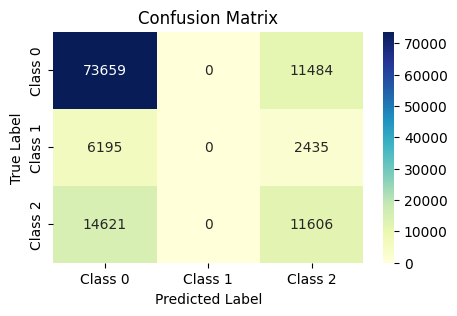

In [59]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(target_train, predictions_train), annot = True, fmt = 'd', cmap="YlGnBu", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## Confusion Matrix for Test

In [ ]:
# confusion matrix for test
results_lr.groupby("cancel").pivot("prediction_lr").count().show()

+------+------+-----+
|cancel|   0.0|  2.0|
+------+------+-----+
|   0.0|211234|33288|
|   1.0| 17737| 7035|
|   2.0| 42000|33597|
+------+------+-----+



Text(0.5, 1.0, 'Confusion Matrix')

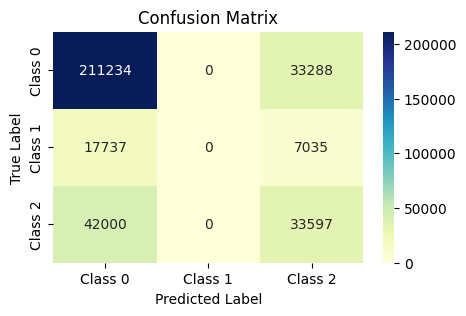

In [60]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(target_test, predictions_test), annot = True, fmt = 'd', cmap="YlGnBu", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

The model does not predict any values for Class 1. This is mainly becuase of the class imbalance as we only have 7% values in the total data that are of Class 1. Even though our model does not predict any class 1 labels, we still have a decent weighted F1 score because of good predictions for Class 0 and 2.

Additionally, the values for Accuracy, Precision and F1 for all the class across train and test are almost the same. This shows us that the model fits well on unseen data and does not overfit on the training data.

# Model Evaluation

## Top 5 Features per Class with highest coefficients

In [ ]:
# Get the logistic regression model from the pipeline
lr_model = train_pipeline_model.stages[-1]

coefficients = lr_model.coefficientMatrix.toArray()

# Create a dictionary to store the top coefficients for each class
top_coefficients = {0: [], 1: [], 2: []}

# Loop through each feature and its coefficient for each class
for i, feature in enumerate(feature_names):
    for j in range(3):
        coefficient = coefficients[j][i]
        top_coefficients[j].append((feature, coefficient))

# Sort the coefficients by absolute value and get the top 5 for each class
for j in range(3):
    top_coefficients[j].sort(key=lambda x: abs(x[1]), reverse=True)
    print(f"Top 5 coefficients for class {j}:")
    for feature, coefficient in top_coefficients[j][:5]:
        print(f"\t{feature}: {coefficient:.3f}")

Top 5 coefficients for class 0:
	len_at_res_i: 0.862
	state_VA: -0.677
	tenure_i: -0.621
	credit_low: -0.542
	age_bucket_label_60+: 0.514
Top 5 coefficients for class 1:
	len_at_res_i: -0.620
	tenure_i: 0.409
	age_bucket_label_60+: -0.371
	premium_i: -0.280
	state_PA: -0.279
Top 5 coefficients for class 2:
	state_VA: 0.527
	credit_low: 0.356
	len_at_res_i: -0.242
	tenure_i: 0.213
	credit_high: -0.169


## Top 10 Feature Coefficients (Absolute Value)

In [ ]:
# Get the feature names from the assembler
#feature_names = preml_assembler.getInputCols()

# Get the top 10 coefficients across all classes
num_classes = len(lr_model.coefficientMatrix.toArray())
top_k = 10
coefficients = lr_model.coefficientMatrix.toArray().flatten()
top_k_idx = abs(coefficients).argsort()[-top_k:][::-1]
top_k_values = coefficients[top_k_idx]
print("Top {} coefficients across all classes:".format(top_k))
for idx, (value, feature_idx) in enumerate(zip(top_k_values, top_k_idx)):
    feature_name = feature_names[feature_idx % len(feature_names)]
    class_idx = feature_idx // len(feature_names)
    print("\t{}. Class {}: {}: {:.3f}".format(idx+1, class_idx, feature_name,value))

Top 10 coefficients across all classes:
	1. Class 0: len_at_res_i: 0.862
	2. Class 0: state_VA: -0.677
	3. Class 0: tenure_i: -0.621
	4. Class 1: len_at_res_i: -0.620
	5. Class 0: credit_low: -0.542
	6. Class 2: state_VA: 0.527
	7. Class 0: age_bucket_label_60+: 0.514
	8. Class 0: credit_high: 0.440
	9. Class 0: premium_i: 0.419
	10. Class 1: tenure_i: 0.409


## Feature Importance Plot

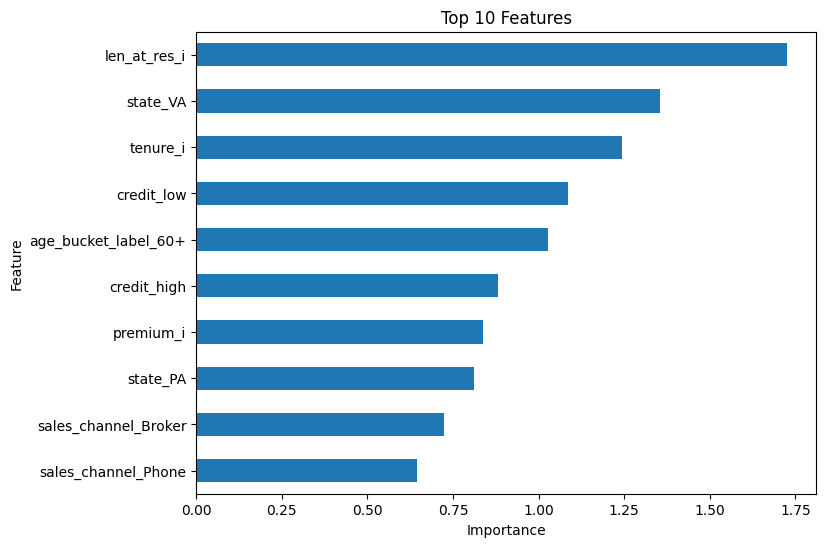

In [ ]:
# Get the coefficients and intercepts for all the classes
coefs = lr_model.coefficientMatrix.toArray()
intercepts = lr_model.interceptVector.toArray()

# Compute the feature importances for each class
importances = np.abs(coefs).sum(axis=0)

# Create a pandas series to plot the feature importances
features_importance = pd.Series(index=feature_names, data=importances)
features_importance.sort_values().tail(10).plot(kind='barh', figsize=(8, 6))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.show()

# Interpretability and Discussion

Class 2 - Cancel

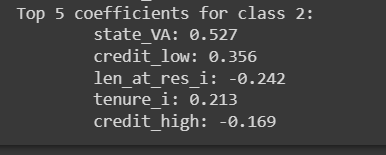

Class 0 - Not Cancel

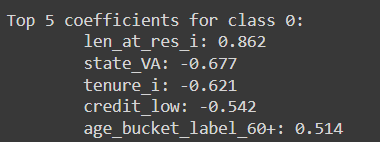



---



Based on the results of our multiclass predictive model, we have identified the variables that are most influential in causing a policy cancellation. The top 5 features for policies that are most likely to be canceled are state_VA, credit_low, len_at_res_i, tenure_i, and credit_high. 



---



For policies that are canceled, the following variables have a **positive impact on the likelihood of cancellation**:

**1. state_VA:** This variable represents the state of Virginia. A 
positive coefficient of 0.527 suggests that policies located in Virginia are more likely to be canceled compared to policies located in other states. This could be due to factors such as higher risk of natural disasters or higher rates of insurance fraud in Virginia.

**2. credit_low:** This variable represents a low credit score. A positive coefficient of 0.356 suggests that policies held by individuals with low credit scores are more likely to be canceled compared to policies held by individuals with higher credit scores. This could be due to the fact that individuals with low credit scores may have a higher likelihood of not paying their premiums on time or submitting fraudulent claims.

**3. tenure_i:** This variable represents the length of time the policy has been in effect. A positive coefficient of 0.213 suggests that policies that have been in effect for longer periods of time are more likely to be canceled compared to policies that have been in effect for shorter periods of time. This could be due to factors such as changes in the risk profile of the policy or changes in the policyholder's circumstances over time.



---


On the other hand, the following variables have a **negative impact on the likelihood of cancellation**:

**1. len_at_res_i:** This variable represents the length of time the policyholder has been at their current residence. A negative coefficient of -0.242 suggests that policies held by individuals who have been at their current residence for longer periods of time are less likely to be canceled compared to policies held by individuals who have been at their current residence for shorter periods of time. This could be due to the fact that individuals who have been at their current residence for longer periods of time may be seen as more stable and less likely to submit fraudulent claims.

**2. credit_high:** This variable represents a high credit score. A negative coefficient of -0.169 suggests that policies held by individuals with high credit scores are less likely to be canceled compared to policies held by individuals with lower credit scores. This could be due to the fact that individuals with higher credit scores may be seen as more financially stable and less likely to submit fraudulent claims.



---


Thus, policies located in Virginia, held by individuals with low credit scores, and policies that have been in effect for longer periods of time are more likely to be canceled. On the other hand, policies held by individuals who have been at their current residence for longer periods of time and policies held by individuals with higher credit scores are less likely to be canceled. 



---



On the other hand, for policies that are most likely to be renewed, the top 5 features are len_at_res_i, state_VA, tenure_i, credit_low, and age_bucket_label_60+. Among these, the most significant variable is len_at_res_i with a coefficient of 0.862. This suggests that policies with longer residential tenures are more likely to be renewed.



---




## Recommendations:

1. Assess the impact of state-specific regulations and laws on policy cancellation rates: The coefficient of the "state_VA" variable was found to be the most influential variable towards policy cancellation. It may be worthwhile for firms to investigate state-specific regulations and laws that may be contributing to higher policy cancellation rates in certain states and develop tailored strategies to mitigate these risks.

2. Offer incentives for longer policy tenure: The "tenure_i" variable had a positive impact on policy cancellation, indicating that shorter tenure was associated with lower cancellation rates. To address this, firms may consider offering incentives to customers who stay with the company for a longer period of time, such as discounts or loyalty rewards.

3. Focus on creditworthiness assessment: Both "credit_low" and "credit_high" had a significant impact on policy cancellation rates. This suggests that assessing the creditworthiness of customers may be an important factor in predicting the likelihood of policy cancellation. Firms may consider developing more robust credit assessment processes and tools to help mitigate the risk of cancellation for customers with lower credit scores.

4. Take into account length of residence: The variable "len_at_res_i" had a negative impact on policy cancellation rates, suggesting that customers who had lived at the same residence for a longer period of time were less likely to cancel their policies. Firms may consider taking into account the length of residence when assessing the risk of policy cancellation and develop tailored strategies for customers with shorter residence times.

5. Consider the impact of age on policy cancellation rates: The variable "age_bucket_label_60+" had a positive impact on policy retention rates. While this variable was not found to be as influential as the other variables, firms may still consider the impact of age on policy cancellation rates and develop strategies to mitigate risks associated with older customers.

# Conclusion


1. In this project, we learned how to preprocess and transform data in PySpark using UDFs, pipelines, and feature engineering techniques. We also learned how to handle imbalanced datasets by training models with different weights and using cross-validation to find optimal weights.

2. We explored the relationship between different features and the target variable using correlation matrices, count plots, bar plots, and tabular representations of various combinations of numeric and categorical data.

3. We trained and evaluated several models, including logistic regression, decision trees, random forests, and ensembling methods such as stacking and perceptron combinations. We used metrics such as classification reports, confusion matrix, and weighted F1 score to evaluate the performance of these models.

4. We found that logistic regression performed best for this business problem, with a weighted F1 score of 0.6795. This model can be used to predict policies that are most likely to be canceled or renewed, and to understand the variables that are most influential in causing a policy cancellation.

5. Through this project, we gained hands-on experience with PySpark and its powerful data processing and modeling capabilities, as well as the importance of data preprocessing and feature engineering in building effective predictive models. We also learned about the challenges of handling imbalanced datasets and how to overcome them using various techniques

